In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from scipy.stats import beta,norm
import seaborn as sns
from numpy.random import default_rng
rng = default_rng()
%matplotlib inline

Forecasts that are provided for a well-defined observed event can be evaluated by analyzing the elements of a 2x2 contingency table. A generic form of the 2x2 contingency table is shown below. The observed value for the $i^{th}$ case can be denoted as $x_i = 1$ (or $obs=yes$) when the event was observed to occur,  $x_i = 0$ (or $obs=no$) when the event did not occur (following the notation of Murphy 1988). Forecasts could be provided in one of several forms: continuous (e.g., probabilistic), ordinal (e.g., slight/moderate/high), or binary (yes/no). Continuous and ordinal forecast values can be converted to binary forecasts via thresholding, $f_i = 1$ (or $fcst=yes$) when the forecast value is greater than or equal to a threshold,  $f_i = 0$ (or $fcst=no$) otherwise. The elements of the contingency table are simply the relative frequencies or proportions of each contingency (joint probabilities) or raw counts of each contingency.

In [162]:
# generic 2x2 contingency table
pd.DataFrame(data=np.array([['a','b','a+b'],['c','d','c+d'],['a+c','b+d','1']]),index=['fcst_yes','fcst_no','fcst_sum'],columns=['obs_yes','obs_no','obs_sum'])

,obs_yes,obs_no,obs_sum
fcst_yes,a,b,a+b
fcst_no,c,d,c+d
fcst_sum,a+c,b+d,1


The “a” element of the contingency table provides the proportion of correct “yes” forecasts, often referred to as “true positives” or “hits”. The “b” element provides the proportion of incorrect “yes” forecasts, also known as “false positives” or “false alarms”. The “c” element provides the proportion of incorrect “no” forecasts, also denoted as “false negatives” or “missed events”. The “d” element provides the proportion of correct “no” forecasts, also called “true negatives” or “correct nulls”.

In [172]:
pd.DataFrame(data=np.array([['a','b',r'$\bar f$'],['c','d',r'1 - $\bar f$'],[r'$\bar x$',r'1 - $\bar x$','1']]),index=['fcst_yes','fcst_no','col_sum'],columns=['obs_yes','obs_no','row_sum'])

,obs_yes,obs_no,row_sum
fcst_yes,a,b,$\bar f$
fcst_no,c,d,1 - $\bar f$
col_sum,$\bar x$,1 - $\bar x$,1


The marginal probabilities (column and row sums) provide information about the overall distributions of observations and forecasts. The overall proportion of observed events is often called the “base rate”, “prevalence”, or “event frequency” ($\bar x = a + c$) . The mean proportion of “yes” forecasts is often called the “mean forecast” or “positive sign rate”  ($\bar f = a + b$).



In [169]:
# 2x2 contingency table counts for Finley's 1884 tornado forecasts
df_finley = pd.DataFrame(data=np.array([[28,72,100],[23,2680,2703],[51,2752,2803]]),index=['fcst_yes','fcst_no','col_sum'],columns=['obs_yes','obs_no','row_sum'])
df_finley

,obs_yes,obs_no,row_sum
fcst_yes,28,72,100
fcst_no,23,2680,2703
col_sum,51,2752,2803


An example of a 2x2 contingency table that has been used in many textbooks and journal articles is from J.P. Finley's 1884 experimental tornado forecasts (Finley, J.P., 1884: Tornado predictions. Amer. Meteor. J., 1, 85-88.). In the example below, the 2x2 table is expressed in terms of proportions.

In [175]:
# 2x2 contingency table for Finley's 1884 tornado forecasts in terms of joint probabilities
df_fin=df_finley/2803.
df_fin

,obs_yes,obs_no,row_sum
fcst_yes,0.009989,0.025687,0.035676
fcst_no,0.008205,0.956118,0.964324
col_sum,0.018195,0.981805,1.000000


In [179]:
# assign elements to variables for easy calculation
a=df_fin.loc['fcst_yes','obs_yes']
b=df_fin.loc['fcst_yes','obs_no']
c=df_fin.loc['fcst_no','obs_yes']
d=df_fin.loc['fcst_no','obs_no']
print(a,b,c,d)

0.009989297181591153 0.025686764181234393 0.008205494113449875 0.9561184445237246


Given a set of binary forecasts and corresponding binary observations, there are numerous measures of forecast quality that can be obtained from the elements of the 2x2 contingency table. Several widely-used measures are conditional probabilities derived from the 2x2 contingency table. Brooks et al. (2024) discussed the history of several of these measures. Finley's 2x2 table will be used as an example in the following calculations, the elements have been assigned to variables named 'a','b','c','d'

## frequency bias (BIAS)
The ratio of the mean frequency of “yes” forecasts to the mean observed event frequency is also known as the “frequency bias” (“bias” for short) that provides information about the overall degree of over- or under-prediction of the forecast system. 

\begin{equation}
BIAS = \frac{a+b}{a+c}
\end{equation}

In [182]:
bias1=(a+b)/(a+c)
print('bias = ',bias1)

bias =  1.9607843137254901


## probability of detection (POD)

Probability of detection (POD) is the conditional probability of a correct forecast given an observed event, also known as “prefigurance”, “sensitivity”, “hit rate”, “recall”, or “true positive rate/ratio”:

\begin{equation}
POD = \frac{a}{a+c}
\end{equation}

In [183]:
pod1=a/(a+c)
print('POD = ',pod1)

POD =  0.5490196078431373


python functions have been created for several of these scores to allow for easy calculation, for example pod(a,b,c,d)

In [186]:
pod1=pod(a,b,c,d)
print('POD = ',pod1)

POD =  0.5490196078431373


In [184]:
# set up functions for score calculations from 2x2 contingency table
def ang2bias(x):
    return np.tan(x*np.pi/180.)

def bias2ang(x):
    return np.arctan(x)*180./np.pi

def pod(a,b,c,d):
    return a/(a+c)
    
def sr(a,b,c,d):
    return a/(a+b)    

def pofd(a,b,c,d):
    return b/(b+d)
    
def mr(a,b,c,d):
    return c/(c+d)

def csi(a,b,c,d):
    return a/(a+b+c)

def tversky(a,b,c,d,gamma):
    return a/(a+gamma*b+(1.-gamma)*c)
    
def pss(a,b,c,d):
    return (a*d-b*c)/(a+c)/(b+d)

def css(a,b,c,d):
    return (a*d-b*c)/(a+b)/(c+d)

def qyule(a,b,c,d):
    return (a*d-b*c)/(a*d+b*c)

def mse(a,b,c,d):
    return b+c
    
def srskill(a,b,c,d):
    return (a*d-b*c)/(a+b)/(b+d)
    
def podskill(a,b,c,d):
    return (a*d-b*c)/(a+c)/(c+d)
    
def deelia(a,b,c,d):
    return np.log(b/(a+b))/np.log(a/(a+c))

def edi(a,b,c,d):
    return (np.log(b/(b+d))-np.log(a/(a+c)))/(np.log(b/(b+d))+np.log(a/(a+c)))

def sedi(a,b,c,d):
    return (np.log(b/(b+d))-np.log(a/(a+c))-np.log(d/(b+d))+np.log(c/(a+c)))/(np.log(b/(b+d))+np.log(a/(a+c))+np.log(d/(b+d))+np.log(c/(a+c)))

def hss(a,b,c,d):
    return 2.*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))

def kappa(a,b,c,d,w):
    return (a*d-b*c)/((1.-w)*(a+c)*(c+d)+w*(a+b)*(b+d))

def dprime(a,b,c,d):
    return norm.ppf(a/(a+c))-norm.ppf(b/(b+d))

def biasodds(a,b,c,d):
    return (a+b)*(b+d)/(a+c)/(c+d)

def oddsr(a,b,c,d):
    return a*d/b/c

def bias(a,b,c,d):
    return (a+b)/(a+c)
    
def phi(a,b,c,d):
    return (a*d-b*c)/np.sqrt((a+c)*(c+d)*(a+b)*(b+d))

def relvalue(a,b,c,d,alpha,xbar):
    if alpha>xbar:
        relval=((1.-alpha)*a-alpha*b)/(1.-alpha)/xbar
    else:
        relval=(alpha*d-(1.-alpha)*c)/alpha/(1.-xbar)
    return relval

def betafa(a,b,c,d):
    return (a/(a+c))/(b/(b+d))
    
def betame(a,b,c,d):
    return (d/(b+d))/(c/(a+c))

def alphafa(a,b,c,d):
    return (a/(a+c))/(a/(a+c)+b/(b+d))
    
def alphame(a,b,c,d):
    return (c/(a+c))/(d/(b+d)+c/(a+c))


In [176]:
def cont_table(fcst,obs):
    # assuming fcst and obs are both binary and are of the same length
    # joint probabilities elelements should sum to 1
    # return elements of 2x2 contingency table as well as a pandas dataframe for easy viewing
    nn=float(len(obs))
    aa=np.sum(obs*fcst)/nn
    bb=np.sum((1.-obs)*fcst)/nn
    cc=np.sum(obs*(1.-fcst))/nn
    dd=np.sum((1.-obs)*(1.-fcst))/nn
    df=pd.DataFrame(data=np.array([[aa,bb,aa+bb],[cc,dd,cc+dd],[aa+cc,bb+dd,aa+bb+cc+dd]]),index=['fcst_yes','fcst_no','col_sum'],columns=['obs_yes','obs_no','row_sum'])
    return aa, bb, cc, dd, df

def cont_table_counts(fcst,obs):
    # assuming fcst and obs are both binary and are of the same length
    # count elelements should sum to nn
    # return elements of 2x2 contingency table as well as a pandas dataframe for easy viewing
    nn=float(len(obs))
    aa=np.sum(obs*fcst)
    bb=np.sum((1.-obs)*fcst)
    cc=np.sum(obs*(1.-fcst))
    dd=np.sum((1.-obs)*(1.-fcst))
    df=pd.DataFrame(data=np.array([[aa,bb,aa+bb],[cc,dd,cc+dd],[aa+cc,bb+dd,aa+bb+cc+dd]]),index=['fcst_yes','fcst_no','col_sum'],columns=['obs_yes','obs_no','row_sum'],dtype='int')
    return aa, bb, cc, dd, df

In [98]:
def synth_data(nn,xbar,fbar,sharp,rhoxf):
    # generate synthetic binary obs with base rate = xbar
    # generate synthetic forecasts [continuous beta-distributed probability-like]
    # generate synthetic forecasts [binary with mean forecast = fbar]
    # rhoxf controls the correlation of the bivariate normal that is used to generate obs and fcst-beta
    # sharp controls the normalized sharpness in determining the beta distribution parameters of the fcsts
    cov = np.array([[1.,rhoxf ], [rhoxf,1.]])
    pts = rng.multivariate_normal([0., 0.], cov, size=nn)
    obs_bin=np.zeros_like(pts[:,0])
    xthresh=norm.ppf(1-xbar,0.,1.)
    obs_bin[pts[:,0]>=xthresh]=1.
    sx21=xbar*(1.-xbar)
    sf21=sharp*sx21
    nu1=fbar*(1-fbar)/sf21-1.
    alpha1=fbar*nu1
    beta1=(1.-fbar)*nu1
    fcst_beta=beta.ppf(norm.cdf(pts[:,1],0.,1.), alpha1,beta1)
    fthresh=np.quantile(fcst_beta,1.-fbar)
    fcst_bin=fcst_beta>=fthresh
    return obs_bin,fcst_beta,fcst_bin

In [177]:
# these values will generate a large sample of data with similar performance characteristics as Finley's 1884 tornado forecasts
nn=100000
xbar=0.0182
fbar=0.0357
rhoxf=0.77
ratio=0.2

obs_pts,fcst_pts,fcst_bin=synth_data(nn,xbar,fbar,ratio,rhoxf)

aa, bb, cc, dd, df_tbl = cont_table(fcst_bin,obs_pts)

# multiply by 2803 to get similar total counts as Finley
df_tbl*2803.

,obs_yes,obs_no,row_sum
fcst_yes,28.17015,71.89695,100.0671
fcst_no,24.38610,2678.54680,2702.9329
col_sum,52.55625,2750.44375,2803.0000


In [123]:
aa, bb, cc, dd = cont_table(fcst_bin,obs_pts)
print([np.round([aa*2803.,bb*2803.]),np.round([cc*2803.,dd*2803.])])
print([[aa,bb],[cc,dd]])
print(aa/(aa+bb+cc))

[array([28., 72.]), array([  23., 2680.])]
[[0.00999, 0.02571], [0.00803, 0.95627]]
0.22844729018980103


In [130]:
df_tbl=pd.DataFrame(data=np.array([[aa,bb],[cc,dd]]),index=['fcst_yes','fcst_no'],columns=['obs_yes','obs_no'])

In [142]:
df_tbl.loc[:,'obs_no']

fcst_yes    0.02571
fcst_no     0.95627
Name: obs_no, dtype: float64

In [143]:
df_tbl.loc['fcst_yes',:]

obs_yes    0.00999
obs_no     0.02571
Name: fcst_yes, dtype: float64

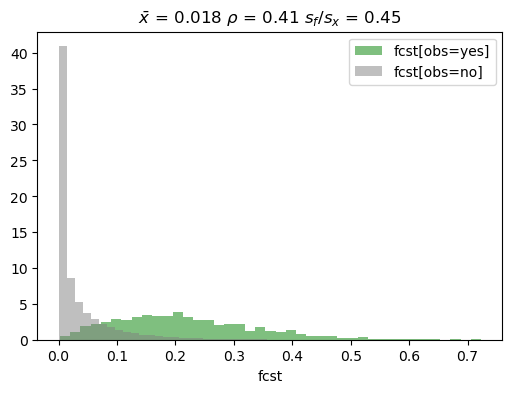

In [119]:
xbar_pts=np.mean(obs_pts)
sx2_pts=np.var(obs_pts,ddof=0)
sf2_pts=np.var(fcst_pts,ddof=0)
rho_pts=np.corrcoef([obs_pts,fcst_pts])[0][1]
sf_sx=np.sqrt(sf2_pts)/np.sqrt(sx2_pts)

leg1=r' $\rho$' + f' = {np.round(rho_pts,2)}'
sharp=r' $s_f$/$s_x$' + f' = {np.round(sf_sx,2)}'
tit1=r'$\bar x$'+f' = {np.round(xbar_pts,3)}'

fig,axs=plt.subplots(figsize=(6,4))

axs.hist(fcst_pts[obs_pts>=0.5], bins=41,color='green',density=True,label='fcst[obs=yes]',alpha=.5)
axs.hist(fcst_pts[obs_pts<0.5], bins=41,color='gray',density=True,label='fcst[obs=no]',alpha=.5)
axs.set_title(tit1+leg1+sharp)
axs.set_xlabel('fcst')
axs.legend()